# Performing Exploratory Data Analysis for Student Retention

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

from tools.utils import combine_columns, compute_feature_importance

In [ ]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")
data = data.drop('Unnamed: 0', axis=1)

,UNITID,INSTNM,CITY,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,CCUGPROF,...,MD_FAMINC,FAMINC_IND,MN_EARN_WNE_P10,UGDS_MEN,UGDS_WOMEN,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,PRGMOFR,ADMCON7
0,100654,Alabama A & M University,Normal,4,1,1,5,12.0,NaN,10.0,...,23553,10340.346032,35500,0.3978,0.6022,884.0,0.5533,NaN,NaN,1.0
1,100663,University of Alabama at Birmingham,Birmingham,4,1,1,5,12.0,NaN,9.0,...,34489,30607.18029,48400,0.3816,0.6184,8685.0,0.8477,NaN,NaN,1.0
2,100690,Amridge University,Montgomery,4,2,1,5,12.0,NaN,5.0,...,15033.5,20596.158491,47600,0.2886,0.7114,477.0,0.5000,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,Huntsville,4,1,1,5,12.0,NaN,15.0,...,44787,27941.821963,52000,0.5891,0.4109,1972.0,0.8234,NaN,NaN,1.0
4,100724,Alabama State University,Montgomery,4,1,1,5,12.0,NaN,10.0,...,22080.5,8551.802974,30600,0.3605,0.6395,458.0,0.6164,NaN,NaN,1.0


In [ ]:
four_yr_retention = data.RET_FT4
less_four_yr_retention = data.RET_FTL4

## Histograms for Retention Rates

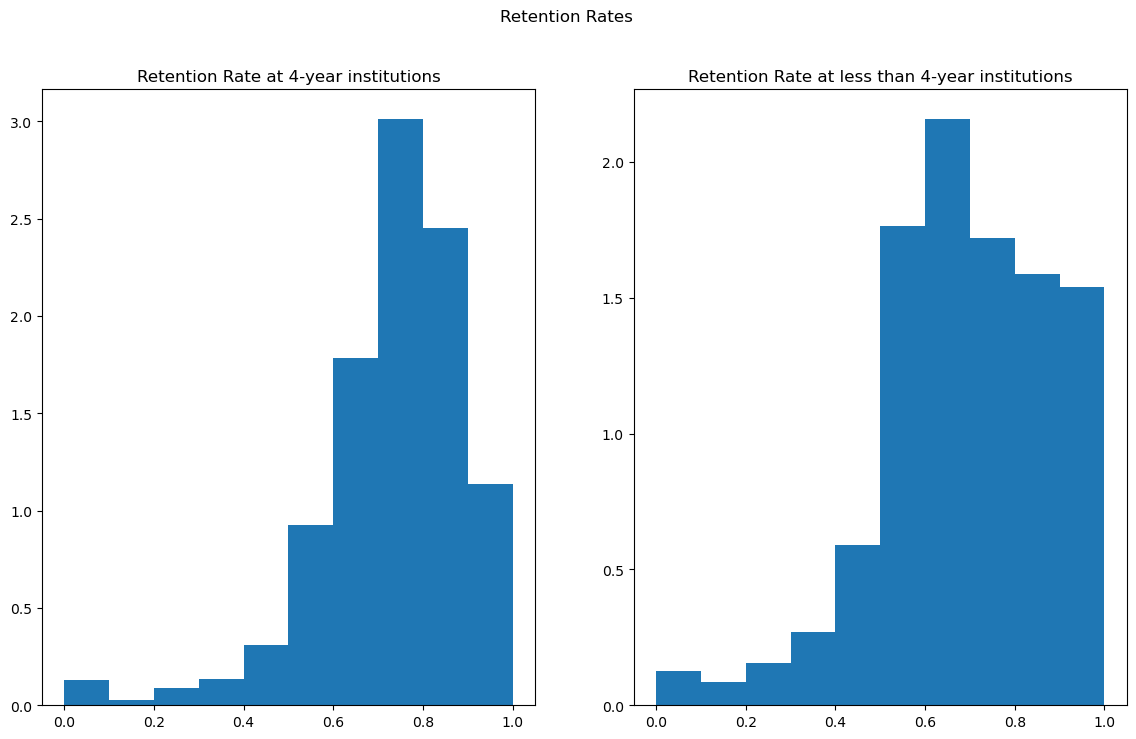

<Figure size 1400x800 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(four_yr_retention, density = True)

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(less_four_yr_retention, density = True)

plt.show()
plt.savefig('figures/figure_1.png')

Based on the histograms, we notice that retention rates for both 4-year and less than 4-year institutions appear to have a left-skewed distribution. However, less than 4-year institutions has more density contained within the higher retention rates compared to the 4-year institutions.

We will now explore sets of relevant variables and their relation to the retention rates.

### Feature Analysis on Numerical variables (not including "Privacy Suppressed" variables)

In [ ]:
fouryr_features = ['HIGHDEG', 'ADM_RATE', 'ST_FIPS', 'LOCALE', 'SAT_AVG', 'CCUGPROF', 'CCSIZSET',
            'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN' , 
            'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA','UGDS_UNKN', 
            'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'INEXPFTE', 'AVGFACSAL' , 'PFTFAC',
            'PCTPELL', 'PCTFLOAN', 'AGE_ENTRY', 
            'FAMINC','MD_FAMINC', 'ADMCON7', 'UGDS_MEN', 'UGDS_WOMEN', 'ANP',
            ## four year specific
            'RET_FT4']

clean_data = combine_columns(data, 'NPT4_PUB', 'NPT4_PRIV', 'ANP')[fouryr_features].dropna()

In [ ]:
compute_feature_importance(clean_data, 'RET_FT4')

,Feature,Importance
4,SAT_AVG,0.225643
19,AVGFACSAL,0.133965
24,FAMINC,0.062228
21,PCTPELL,0.062037
5,CCUGPROF,0.060383
6,CCSIZSET,0.049620
10,UGDS_ASIAN,0.040125
25,MD_FAMINC,0.029388
18,INEXPFTE,0.025987
17,TUITIONFEE_OUT,0.019062


In [ ]:
less_fouryr_features = ['HIGHDEG', 'ADM_RATE', 'ST_FIPS', 'LOCALE', 'SAT_AVG', 'CCUGPROF', 'CCSIZSET',
            'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN' , 
            'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA','UGDS_UNKN', 
            'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'INEXPFTE', 'AVGFACSAL' , 'PFTFAC',
            'PCTPELL', 'PCTFLOAN', 'AGE_ENTRY', 
            'FAMINC','MD_FAMINC', 'ADMCON7', 'UGDS_MEN', 'UGDS_WOMEN', 'ANP',
            ## less than four year specific
            'RET_FTL4']

clean_data = combine_columns(data, 'NPT4_PUB', 'NPT4_PRIV', 'ANP')[less_fouryr_features].dropna()

In [ ]:
compute_feature_importance(clean_data, 'RET_FTL4')

,Feature,Importance
9,UGDS_HISP,0.128479
11,UGDS_AIAN,0.122401
5,CCUGPROF,0.119550
18,INEXPFTE,0.079287
8,UGDS_BLACK,0.077447
12,UGDS_NHPI,0.075504
14,UGDS_NRA,0.062974
16,TUITIONFEE_IN,0.041554
13,UGDS_2MOR,0.037260
15,UGDS_UNKN,0.026139


## Many Null Values

Pre-emptively lets look at the null values for each of the variables we will be focusing on. 

Student retention, the dependent variables in our analaysis, are red.

In [ ]:
nulls_by_column = data.isna().sum().sort_values(ascending=False)

In [ ]:
colors = np.tile('b', len(nulls_by_column))

retention = ["RET_FT4", "RET_FTL4"]
retention_vars_mask = pd.Series(nulls_by_column.index).isin(retention).values
colors[retention_vars_mask] = np.tile('r', len(retention))

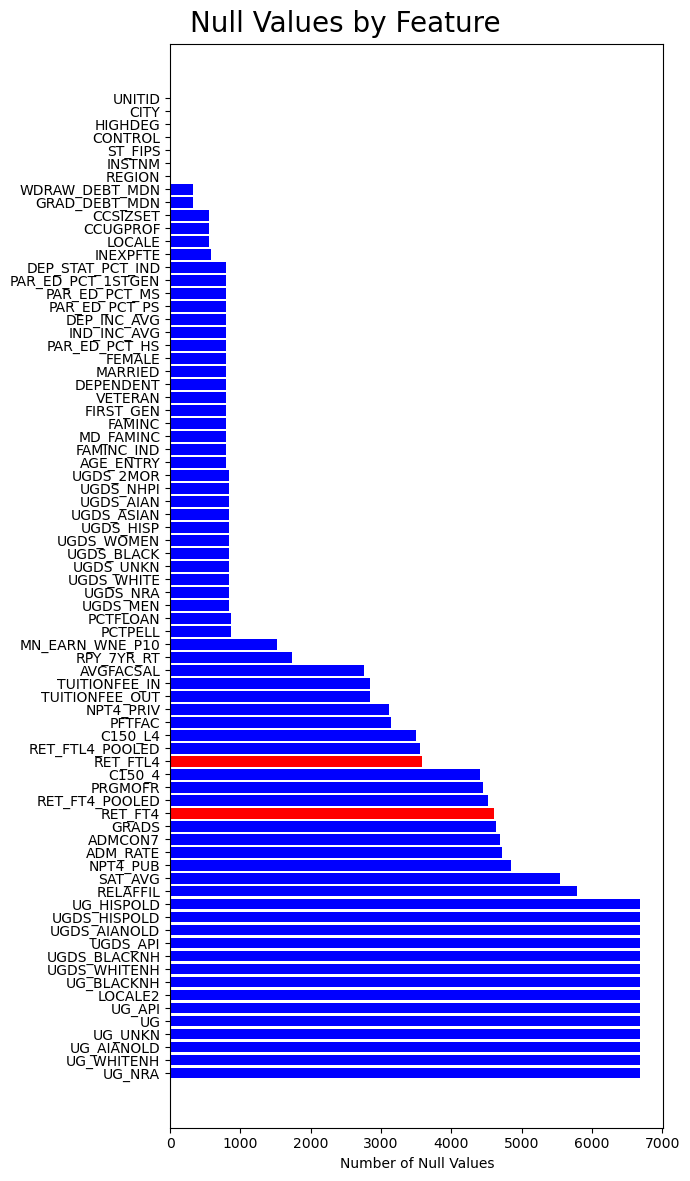

In [ ]:
fig, ax = plt.subplots(figsize=(7, 12))
ax.barh(np.arange(-5, len(nulls_by_column)-5), nulls_by_column.values, color=colors)
ax.set_yticks(np.arange(-5, len(nulls_by_column)-5), labels=nulls_by_column.index)
ax.set_xlabel("Number of Null Values")
fig.suptitle("Null Values by Feature", size=20)
fig.tight_layout();

We will be dealing with a high amount of null values, especially when looking at the number of programs. In fact, the last several columns listed are entirely null.